In [2]:
import pandas as pd
from influxdb_client import InfluxDBClient
import seaborn as sns
import matplotlib.pyplot as plt

# A few helper functions:
from utils import *

# To illustrate examples
import numpy as np
from scipy.stats import mannwhitneyu, normaltest

url = 'http://192.168.254.89:8086'
token = 'root:root'
org = ''
bucket = 'esp2nred'

with InfluxDBClient(url=url, token=token, org=org) as client:
    query_api = client.query_api()
    #tables = query_api.query('from(bucket: "esp2nred") |> range(start: -7d) |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")')
    #tables = client.query_api().query(query, org=org)
    #for table in tables:
    #    for record in table.records:
    #        print(record)
    # pivot is in the influxdb query
    df = pd.DataFrame(client.query_api().query_data_frame('from(bucket: "esp2nred") |> range(start: -3d) |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")'))
df.head()

,result,table,_time,_start,_stop,_measurement,device,location,humidityi,tempf
0,_result,0,2023-09-06 20:41:27.844000+00:00,2023-09-06 20:41:21.418067+00:00,2023-09-09 20:41:21.418067+00:00,data,temp,1,63.0,76.8
1,_result,0,2023-09-06 20:46:27.654000+00:00,2023-09-06 20:41:21.418067+00:00,2023-09-09 20:41:21.418067+00:00,data,temp,1,63.0,76.8
2,_result,0,2023-09-06 20:51:27.612000+00:00,2023-09-06 20:41:21.418067+00:00,2023-09-09 20:41:21.418067+00:00,data,temp,1,63.0,76.8
3,_result,0,2023-09-06 20:56:27.624000+00:00,2023-09-06 20:41:21.418067+00:00,2023-09-09 20:41:21.418067+00:00,data,temp,1,62.0,76.8
4,_result,0,2023-09-06 21:01:27.764000+00:00,2023-09-06 20:41:21.418067+00:00,2023-09-09 20:41:21.418067+00:00,data,temp,1,62.0,76.8


<Axes: xlabel='location', ylabel='tempf'>

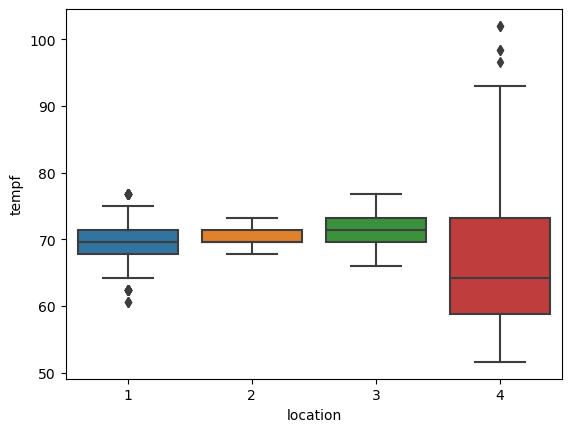

In [2]:
sns.boxplot(data=df, x='location', y='tempf')

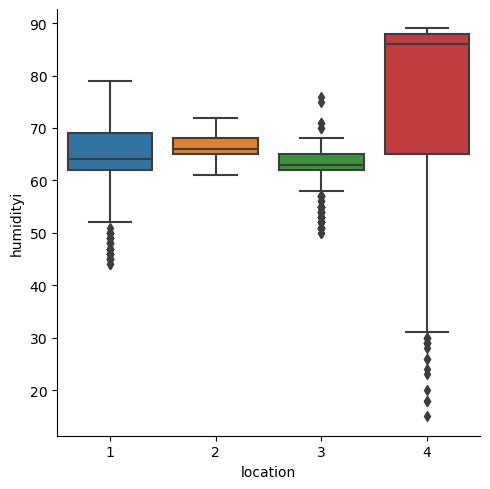

In [3]:
i = sns.catplot(x="location", y="humidityi", data=df, ci='sd', kind="box")

In [4]:
list(df.location.unique())

['1', '2', '3', '4']

In [5]:
loc = df.loc[(df.location=='4'), :]
print_n_projects(loc, '4')
#print_projects_by(loc, 'device', 'count')

There are 705 projects in 4.


In [6]:
df.describe() 

,table,humidityi,tempf
count,2842.000000,2842.000000,2842.000000
mean,1.477833,67.023927,69.513230
std,1.163674,10.719593,5.533039
min,0.000000,15.000000,51.600000
25%,0.000000,63.000000,67.800000
50%,2.000000,65.000000,69.600000
75%,2.000000,70.000000,73.200000
max,3.000000,89.000000,102.000000


In [7]:
df.groupby('location')['tempf'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
1,864.0,69.683332,3.341554,60.6,67.8,69.6,71.39999,76.8
2,461.0,70.443384,1.817124,67.8,69.6,69.6,71.40000,73.2
3,812.0,71.415517,2.511567,66.0,69.6,71.4,73.20000,76.8
4,705.0,66.505532,9.305814,51.6,58.8,64.2,73.20000,102.0


In [9]:
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):  # more options can be specified also
    display(df)

,result,table,_time,_start,_stop,_measurement,device,location,humidityi,tempf
0,_result,0,2023-09-06 19:51:27.707000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,1,62.0,76.8
1,_result,0,2023-09-06 19:56:27.749000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,1,62.0,76.8
2,_result,0,2023-09-06 20:01:27.878000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,1,62.0,76.8
3,_result,0,2023-09-06 20:06:27.811000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,1,61.0,75.0
4,_result,0,2023-09-06 20:11:27.839000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,1,63.0,76.8
...,...,...,...,...,...,...,...,...,...,...
2837,_result,3,2023-09-09 19:15:26.576000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,4,30.0,91.2
2838,_result,3,2023-09-09 19:28:36.971000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,4,31.0,89.4
2839,_result,3,2023-09-09 19:35:11.818000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,4,29.0,89.4
2840,_result,3,2023-09-09 19:41:45.118000+00:00,2023-09-06 19:50:21.151714+00:00,2023-09-09 19:50:21.151714+00:00,data,temp,4,32.0,87.6


In [31]:
dfHist = df[['humidityi', 'tempf']]
#dfHist.head()
#dftest = pd.pivot_table(dfHist, values = 'humidityi', index=['_time'], columns = 'location').reset_index()
#display(dftest)

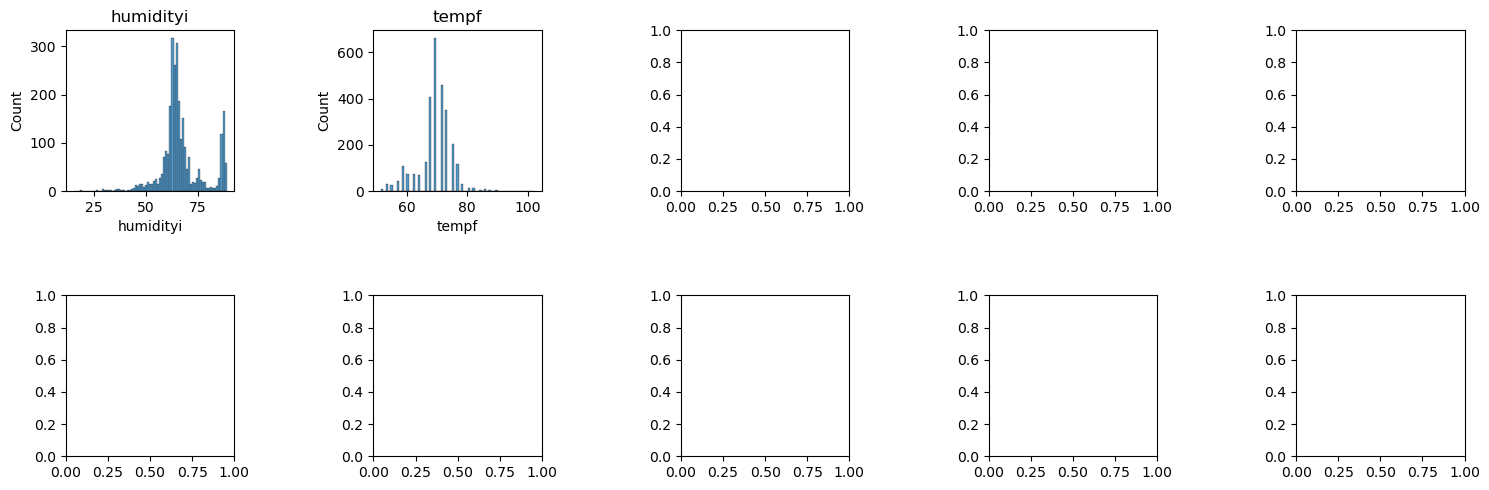

In [32]:
fig, axes = plt.subplots(2,5, figsize=(15, 5))
ax = axes.flatten()

for i, col in enumerate(dfHist.columns):
    sns.histplot(dfHist[col], ax=ax[i]) # histogram call
    ax[i].set_title(col)
    # remove scientific notation for both axes
    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=6, h_pad=4) # change padding 
plt.show()
